In [1]:
import pandas as pd                    # to manipulate data
import numpy as np                     # to change data to array
import glob                            # to read files in the folder
import matplotlib.pyplot as plt        # to visulaize data
import seaborn as sns                  # to visualize data
import joblib
import pickle

In [2]:
path1 = r'./22-Feb-2023_15_44_37_UTdatasetAI/Cat1_0.3-0.4/'
files_type1 = glob.glob(path1+'/*.txt')
path2 = r'./22-Feb-2023_15_44_37_UTdatasetAI/Cat2_0.5-0.6/'
files_type2 = glob.glob(path2+'/*.txt')
path3 = r'./22-Feb-2023_15_44_37_UTdatasetAI/Cat3_0.7-0.8/'
files_type3 = glob.glob(path3+'/*.txt')
path4 = r'./22-Feb-2023_15_44_37_UTdatasetAI/Cat4_0.9-1.0/'
files_type4 = glob.glob(path4+'/*.txt')

In [3]:
def reading_data(files):
#     num_lines_per_row = 301
    data_rows = []    
    for file in files:
        with open(file, "r") as f: # Open the text file and read the data
            row_lines = [] # Initialize a list to hold the lines for each row
            for line in f:    # Append the line to the row_lines list        
                row_lines.append(line.strip())   # If we have reached the desired number of lines per row,        # add the row to the data_rows list and reset the row_lines list        
#                 if len(row_lines) == num_lines_per_row:
                data_rows.append(row_lines)
                row_lines = []
    df = pd.DataFrame(data_rows)
    return df

In [4]:
df0 = np.array([reading_data(files_type1)])
df1 = np.array([reading_data(files_type2)])
df2 = np.array([reading_data(files_type3)])
df3 = np.array([reading_data(files_type4)])

batch_size_dataset0 = int(df0.shape[1]/(81*301))
dataset0 = df0.reshape(batch_size_dataset0,9,9,301).astype('float32')
batch_size_dataset1 = int(df0.shape[1]/(81*301))
dataset1 = df1.reshape(batch_size_dataset1,9,9,301).astype('float32')
batch_size_dataset2 = int(df0.shape[1]/(81*301))
dataset2 = df2.reshape(batch_size_dataset2,9,9,301).astype('float32')
batch_size_dataset3 = int(df0.shape[1]/(81*301))
dataset3 = df3.reshape(batch_size_dataset3,9,9,301).astype('float32')

X = np.concatenate([dataset0, dataset1, dataset2, dataset3], axis=0)
batch_size = X.shape[0]
print(batch_size)
print(f'X shape: {X.shape}')
print(f'df0 shape: {dataset0.shape}')
print(f'df1 shape: {dataset1.shape}')
print(f'df2 shape: {dataset2.shape}')
print(f'df3 shape: {dataset3.shape}')
len(X)
print(batch_size_dataset0)
print(batch_size_dataset0)
print(batch_size_dataset0)
print(batch_size_dataset0)

416
X shape: (416, 9, 9, 301)
df0 shape: (104, 9, 9, 301)
df1 shape: (104, 9, 9, 301)
df2 shape: (104, 9, 9, 301)
df3 shape: (104, 9, 9, 301)
104
104
104
104


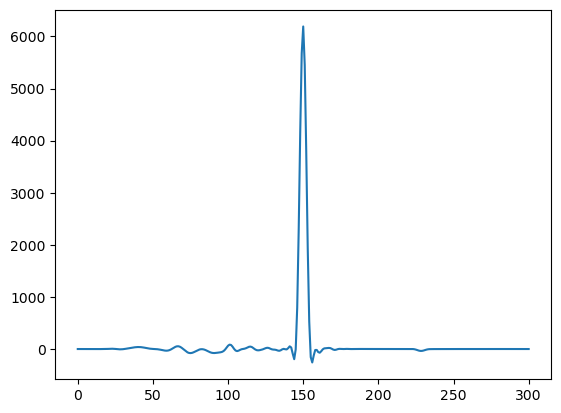

In [5]:
plt.plot(X[0][4][4])

In [6]:
y = np.empty(X.shape[0], dtype=np.int)
# Assign labels to each class
y[:dataset0.shape[0]] = 1
y[dataset0.shape[0]:dataset0.shape[0]+dataset1.shape[0]] = 2
y[dataset0.shape[0]+dataset1.shape[0]:dataset0.shape[0]+dataset1.shape[0]+dataset2.shape[0]] = 3
y[dataset0.shape[0]+dataset1.shape[0]+dataset2.shape[0]:] = 4

C:\Users\eftek\AppData\Local\Temp\ipykernel_14200\3618301694.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.empty(X.shape[0], dtype=np.int)


In [7]:
y.shape

(416,)

In [8]:
print(f'Classe_one: {y[0]}')
print(f'Classe_two: {y[dataset0.shape[0]]}')
print(f'Classe_three: {y[dataset0.shape[0]+dataset1.shape[0]]}')
print(f'Classe_four: {y[dataset0.shape[0]+dataset1.shape[0]+dataset2.shape[0]]}')

Classe_one: 1
Classe_two: 2
Classe_three: 3
Classe_four: 4


# Clustering PCA

In [ ]:
from sklearn.decomposition import PCA

X_reshape_2D = X.reshape(416, 24381)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_reshape_2D)

X_pca.shape

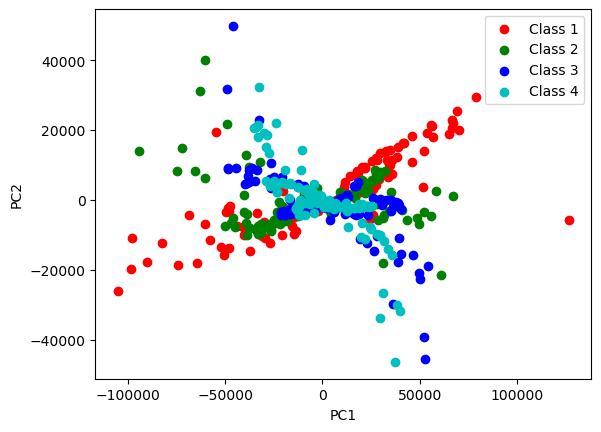

In [10]:
# Normalize the data
# scaler = StandardScaler()
# X_scaled_pca = scaler.fit_transform(X_scaler)

# Apply PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled_pca)

# Plot the data
colors = ['r', 'g', 'b', 'c'] # Colors for each class
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4'] # Class labels
for i in range(4):
    plt.scatter(X_pca[y == (i+1), 0], X_pca[y == (i+1), 1], c=colors[i], label=labels[i])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

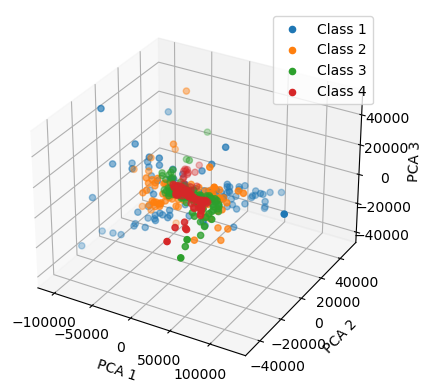

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume your data is stored in a numpy array called `data` with shape (416, 9, 9, 301)
n_samples = X.shape[0]
n_features = X.shape[1] * X.shape[2] * X.shape[3]


# Reshape data into a 2D array
data_2d = np.reshape(X, (n_samples, n_features))

# Perform PCA on the data
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_2d)

# Get the class labels for each instance
# Assume the class labels are stored in a numpy array called `labels`
# labels = np.array([0, 1, 2, 3]) # Replace with your own labels

# Create a scatter plot of the data in 3D using the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
#     mask = (y == label)
#     ax.scatter(data_pca[mask.flatten(), 0], data_pca[mask.flatten(), 1], data_pca[mask.flatten(), 2], label=label)
#     ax.scatter(data_pca[mask, 0], data_pca[mask, 1], data_pca[mask, 2], label=label)
#     indices = np.where(mask)[0]
    ax.scatter(data_pca[y == (i+1), 0], data_pca[y == (i+1), 1], data_pca[y == (i+1), 2], label=f'Class {i+1}')

#     ax.scatter(data_pca[mask, 0], data_pca[mask, 1], data_pca[mask, 2], label=label)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()
plt.show()




# KPCA

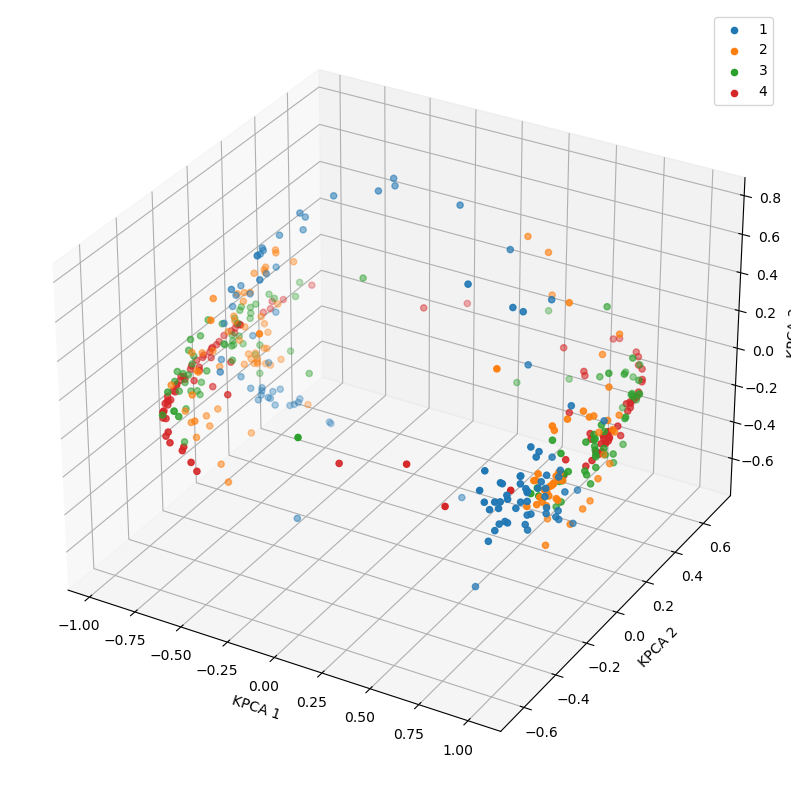

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import KernelPCA
from sklearn.metrics.pairwise import rbf_kernel


# flatten data to 2D
data = X.reshape((X.shape[0], -1))


# perform kernel PCA
kpca = KernelPCA(n_components=3, kernel="cosine", gamma=0.1)
data_kpca = kpca.fit_transform(data)

# plot results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
for label in np.unique(y):
    mask = (y == label)
    ax.scatter(data_kpca[mask, 0], data_kpca[mask, 1], data_kpca[mask, 2], label=label)
ax.set_xlabel("KPCA 1")
ax.set_ylabel("KPCA 2")
ax.set_zlabel("KPCA 3")
plt.legend()
plt.show()


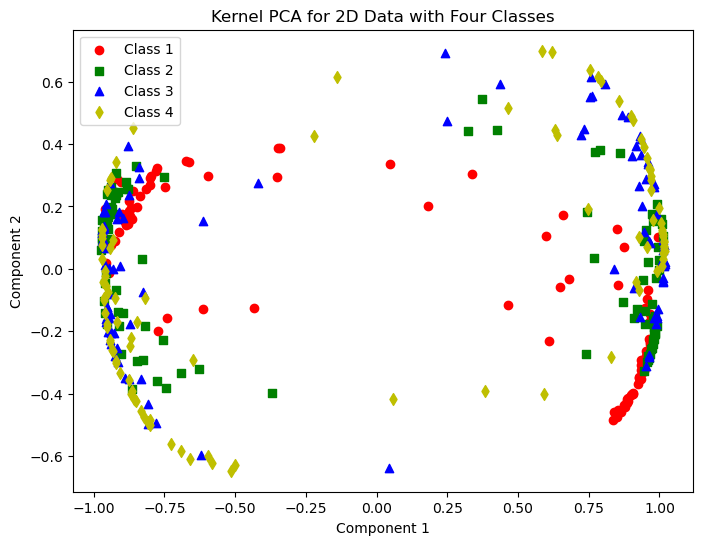

In [13]:
# flatten data to 2D
data = X.reshape((X.shape[0], -1))

# perform kernel PCA
kpca = KernelPCA(n_components=2, kernel="cosine", gamma=0.1)
data_kpca = kpca.fit_transform(data)

# plot results
plt.figure(figsize=(8, 6))
plt.scatter(data_kpca[y==1, 0], data_kpca[y==1, 1], c='r', marker='o', label='Class 1')
plt.scatter(data_kpca[y==2, 0], data_kpca[y==2, 1], c='g', marker='s', label='Class 2')
plt.scatter(data_kpca[y==3, 0], data_kpca[y==3, 1], c='b', marker='^', label='Class 3')
plt.scatter(data_kpca[y==4, 0], data_kpca[y==4, 1], c='y', marker='d', label='Class 4')
plt.title('Kernel PCA for 2D Data with Four Classes')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
y_train.shape

(332, 9, 9, 301)
(332,)


(332,)

# K Nearst

In [15]:
# Kn

# Since KNN just work in 2D first need to be reshaped
n_samples_train = X_train.shape[0]
# n_samples_test = X_test[0]
X_train_2d = X_train.reshape(n_samples_train, -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)
from sklearn.neighbors import KNeighborsClassifier

classifier_kn1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
history_kn1 = classifier_kn1.fit(X_train_2d, y_train)

In [16]:
X_test_2d.shape

(84, 24381)

In [17]:
y_pred_kn1 = classifier_kn1.predict(X_test_2d)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

Confusion_matrix_Kn1 = confusion_matrix(y_test, y_pred_kn1)
accuracy_kn1 = accuracy_score(y_test,y_pred_kn1)
accuracy_kn1

0.7261904761904762

Text(95.72222222222221, 0.5, 'Actual')

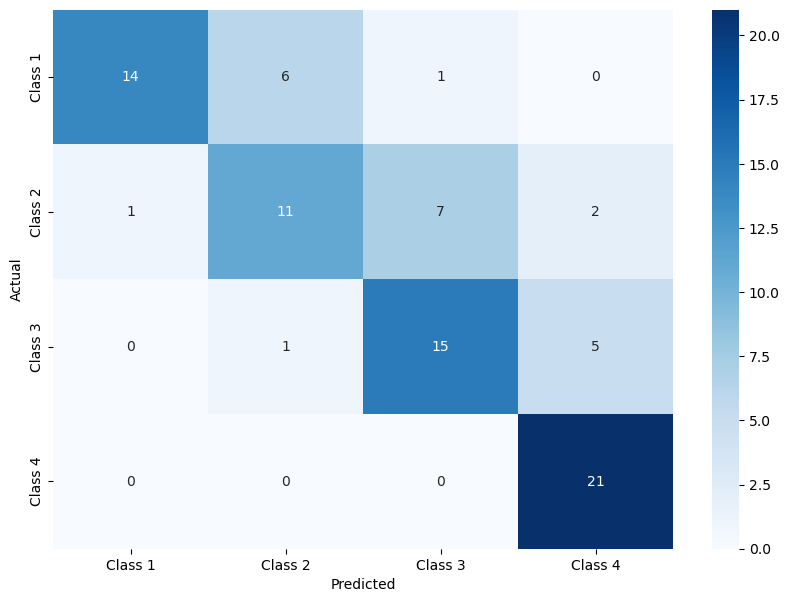

In [19]:
# Confusion_matrix_Kn1
plt.figure(figsize = (10,7))
ax = sns.heatmap(Confusion_matrix_Kn1, annot=True, cmap="Blues")

# ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# set y-axis label and ticks
# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])



plt.xlabel('Predicted')
plt.ylabel('Actual')



In [20]:
from keras.utils import to_categorical
# The to_categorical function assumes that class labels start from 0.   ###take care more !!!

num_Classes = len(np.unique(y))

y_train_zero = y_train - 1
y_test_zero = y_test - 1

y_train_onehot = to_categorical(y_train_zero, num_Classes)
y_test_onehot = to_categorical(y_test_zero, num_Classes)
# print(y_train_onehot[1])
# print(y_test_onehot[2])

num_Classes

4

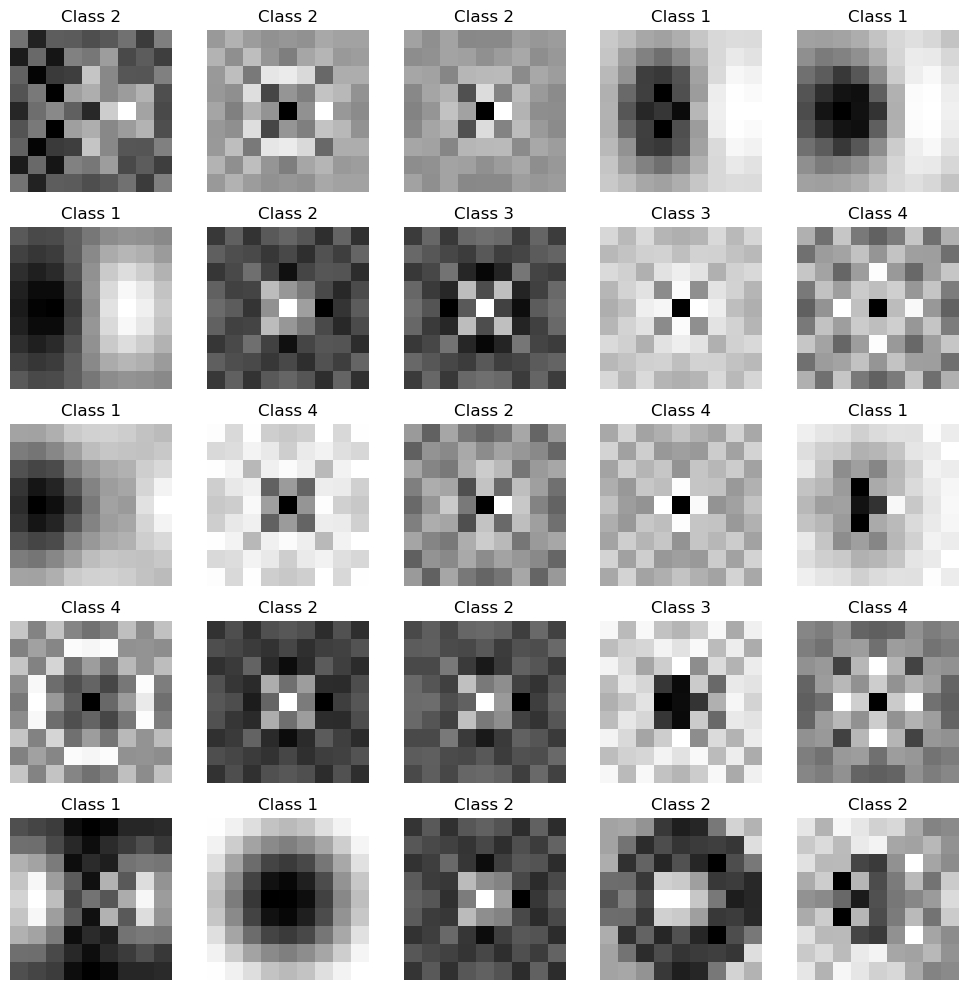

In [21]:
import numpy as np
import matplotlib.pyplot as plt

num_classes = 4

# create a figure with 5 rows and 5 columns to display 25 sample images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# randomly select 25 samples from the dataset
Random_samples = np.random.choice(X.shape[0], size=25, replace=False)

# iterate over the sample indices and plot each image with its corresponding label
for i, index in enumerate(Random_samples):
    # get the image and its label
    image = X[index]
    label = y[index]
    
    # compute the row and column indices for this image
    row = i // 5
    col = i % 5
    
    # plot the image in the appropriate subplot
    axes[row, col].imshow(image[..., 0], cmap='gray')
    axes[row, col].set_title(f'Class {label}')
    axes[row, col].axis('off')
    
# adjust the spacing between the subplots and display the figure
fig.tight_layout()
plt.show()


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define the model
model_2 = Sequential()
model_2.add(Conv2D(128, kernel_size=(1, 1), activation='sigmoid', input_shape=(9, 9, 301)))
model_2.add(MaxPooling2D(pool_size=(1, 1)))
model_2.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))
model_2.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))

model_2.add(MaxPooling2D(pool_size=(1, 1)))
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(4, activation='softmax'))

# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history_2 = model_2.fit(X_train, y_train_onehot, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
17/17 [==============================] - 4s 65ms/step - loss: 1.8727 - accuracy: 0.2830 - val_loss: 1.1549 - val_accuracy: 0.4179
Epoch 2/50
17/17 [==============================] - 1s 46ms/step - loss: 1.0498 - accuracy: 0.5321 - val_loss: 0.9867 - val_accuracy: 0.5672
Epoch 3/50
17/17 [==============================] - 1s 46ms/step - loss: 0.7992 - accuracy: 0.6830 - val_loss: 0.9283 - val_accuracy: 0.5522
Epoch 4/50
17/17 [==============================] - 1s 47ms/step - loss: 0.5763 - accuracy: 0.8000 - val_loss: 0.6936 - val_accuracy: 0.6716
Epoch 5/50
17/17 [==============================] - 1s 47ms/step - loss: 0.3460 - accuracy: 0.9019 - val_loss: 0.5516 - val_accuracy: 0.7612
Epoch 6/50
17/17 [==============================] - 1s 49ms/step - loss: 0.2106 - accuracy: 0.9283 - val_loss: 0.5321 - val_accuracy: 0.8209
Epoch 7/50
17/17 [==============================] - 1s 44ms/step - loss: 0.1429 - accuracy: 0.9509 - val_loss: 0.3649 - val_accuracy: 0.8507
Epoch 8/50
17

In [24]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 128)         38656     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          8256      
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          4160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5184)              0

# plot the model

In [25]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model_2, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
y_pred_model_2 = model_2.predict(X_test)

3/3 [==============================] - 0s 12ms/step


In [27]:
y_pred_model_2.shape

(84, 4)

In [28]:
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

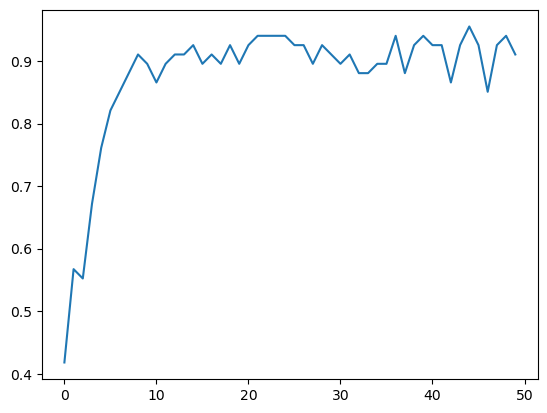

In [29]:
plt.plot(history_2.history['val_accuracy'])

In [30]:
loss_model_2 , accuracy_model_2 = model_2.evaluate(X_test, y_test_onehot)

3/3 [==============================] - 0s 15ms/step - loss: 1.3098 - accuracy: 0.8095


In [49]:
cm_model_2 = confusion_matrix(y_test_onehot.argmax(axis=1), y_pred_model_2.argmax(axis=1))

accuracy_model_2 = accuracy_score(y_test_onehot.argmax(axis=1), y_pred_model_2.argmax(axis=1))
accuracy_model_2

0.8095238095238095

0.8095238095238095

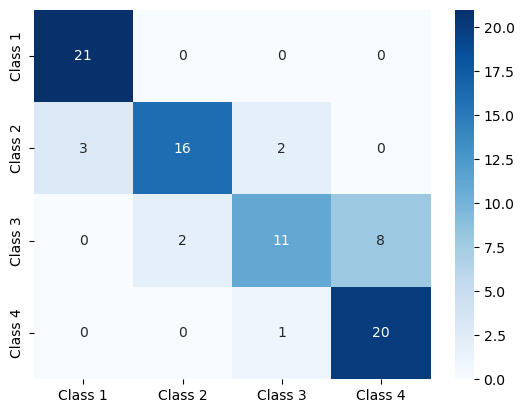

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

# cm_model_2 = confusion_matrix(y_test_onehot.argmax(axis=1), y_pred_model_2.argmax(axis=1))


ax = sns.heatmap(cm_model_2, annot=True, cmap= 'Blues')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])




accuracy = accuracy_score(y_test_onehot.argmax(axis=1), y_pred_model_2.argmax(axis=1))
accuracy

In [52]:
cm_model_2

array([[21,  0,  0,  0],
       [ 3, 16,  2,  0],
       [ 0,  2, 11,  8],
       [ 0,  0,  1, 20]], dtype=int64)

# Anorhter Model

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()
model.add(Conv2D(128, kernel_size=(1, 1), activation='tanh', input_shape=(9, 9, 301)))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(64, kernel_size=(1, 1), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Fit the model to the data
history_model_1 = model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 2s 65ms/step - loss: 2.8052 - accuracy: 0.2642 - val_loss: 1.6425 - val_accuracy: 0.2836
Epoch 2/50
9/9 [==============================] - 0s 38ms/step - loss: 1.3947 - accuracy: 0.3321 - val_loss: 1.3638 - val_accuracy: 0.2687
Epoch 3/50
9/9 [==============================] - 0s 40ms/step - loss: 1.3256 - accuracy: 0.3547 - val_loss: 1.2919 - val_accuracy: 0.2687
Epoch 4/50
9/9 [==============================] - 0s 44ms/step - loss: 1.2713 - accuracy: 0.4264 - val_loss: 1.2719 - val_accuracy: 0.3433
Epoch 5/50
9/9 [==============================] - 0s 40ms/step - loss: 1.2457 - accuracy: 0.4189 - val_loss: 1.2499 - val_accuracy: 0.3284
Epoch 6/50
9/9 [==============================] - 0s 40ms/step - loss: 1.2027 - accuracy: 0.4642 - val_loss: 1.2413 - val_accuracy: 0.3284
Epoch 7/50
9/9 [==============================] - 0s 44ms/step - loss: 1.1921 - accuracy: 0.4755 - val_loss: 1.2217 - val_accuracy: 0.3284
Epoch 8/50
9/9 [===========

In [35]:
y_pred_model_1 = model.predict(X_test)

3/3 [==============================] - 0s 9ms/step


In [36]:
cm_model_1 = confusion_matrix(y_test_onehot.argmax(axis=1), y_pred_model_1.argmax(axis=1))

accuracy = accuracy_score(y_test_onehot.argmax(axis=1), y_pred_model_1.argmax(axis=1))
accuracy

0.8214285714285714

Text(95.72222222222221, 0.5, 'Actual')

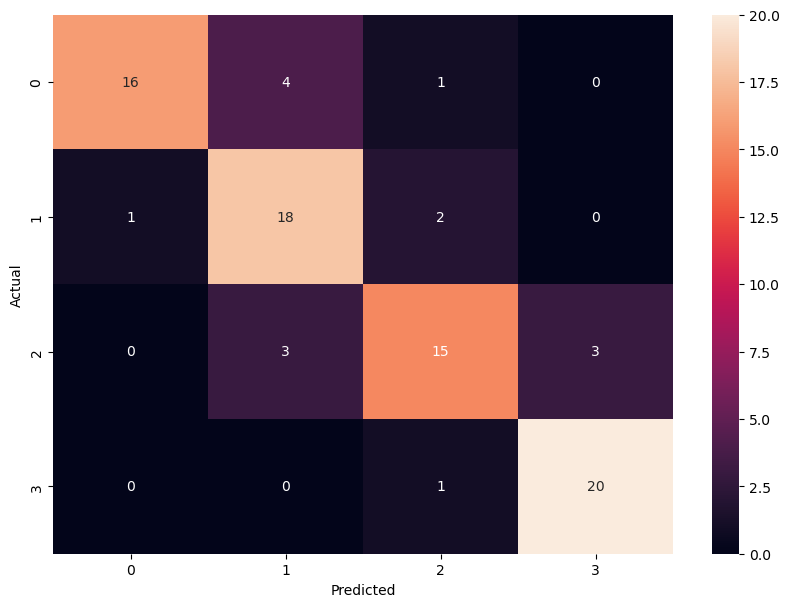

In [37]:
# Confusion_matrix_Kn1
plt.figure(figsize = (10,7))
sns.heatmap(cm_model_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()
model.add(Conv2D(128, kernel_size=(1, 1), activation='tanh', input_shape=(9, 9, 301)))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(64, kernel_size=(1, 1), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# Fit the model to the data
history_model_1 = model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 2s 71ms/step - loss: 2.9226 - accuracy: 0.2792 - val_loss: 1.3812 - val_accuracy: 0.4627
Epoch 2/50
9/9 [==============================] - 0s 40ms/step - loss: 1.4502 - accuracy: 0.2000 - val_loss: 1.4571 - val_accuracy: 0.1642
Epoch 3/50
9/9 [==============================] - 0s 42ms/step - loss: 1.3871 - accuracy: 0.2717 - val_loss: 1.3929 - val_accuracy: 0.2537
Epoch 4/50
9/9 [==============================] - 0s 41ms/step - loss: 1.3696 - accuracy: 0.3094 - val_loss: 1.3715 - val_accuracy: 0.2836
Epoch 5/50
9/9 [==============================] - 0s 42ms/step - loss: 1.3468 - accuracy: 0.3057 - val_loss: 1.3454 - val_accuracy: 0.2687
Epoch 6/50
9/9 [==============================] - 0s 40ms/step - loss: 1.3305 - accuracy: 0.3623 - val_loss: 1.3308 - val_accuracy: 0.2985
Epoch 7/50
9/9 [==============================] - 0s 41ms/step - loss: 1.3236 - accuracy: 0.3283 - val_loss: 1.2805 - val_accuracy: 0.4627
Epoch 8/50
9/9 [===========

In [ ]:
cm_model = confusion_matrix(y_test_onehot.argmax(axis=1), y_pred_model.argmax(axis=1))

accuracy = accuracy_score(y_test_onehot.argmax(axis=1), y_pred_model_1.argmax(axis=1))
accuracy

In [ ]:



ax = sns.heatmap(cm_model_2, annot=True, cmap= 'Blues')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])

# ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 4'])




accuracy = accuracy_score(y_test_onehot.argmax(axis=1), y_pred_model_2.argmax(axis=1))
accuracy

# Normalizing and Applying model

In [40]:
from sklearn.preprocessing import StandardScaler
X_scaler = X.reshape(416, -1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaler)


In [41]:
X_scaled = X.reshape(416,9,9,301)

In [42]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
print(X_train_scaled.shape)
print(y_train_scaled.shape)
y_train_scaled.shape

(332, 9, 9, 301)
(332,)


(332,)

In [43]:
from keras.utils import to_categorical

num_Classes = len(np.unique(y))

y_train_zero_Scales = y_train_scaled - 1
y_test_zero_Scales = y_test_scaled - 1



y_train_scaled_onehot = to_categorical(y_train_zero_Scales, num_Classes)
y_test_scaled_onehot = to_categorical(y_test_zero_Scales, num_Classes)
print(y_train_scaled_onehot[0])
print(y_test_scaled_onehot[2])

num_Classes

[1. 0. 0. 0.]
[0. 0. 1. 0.]


4

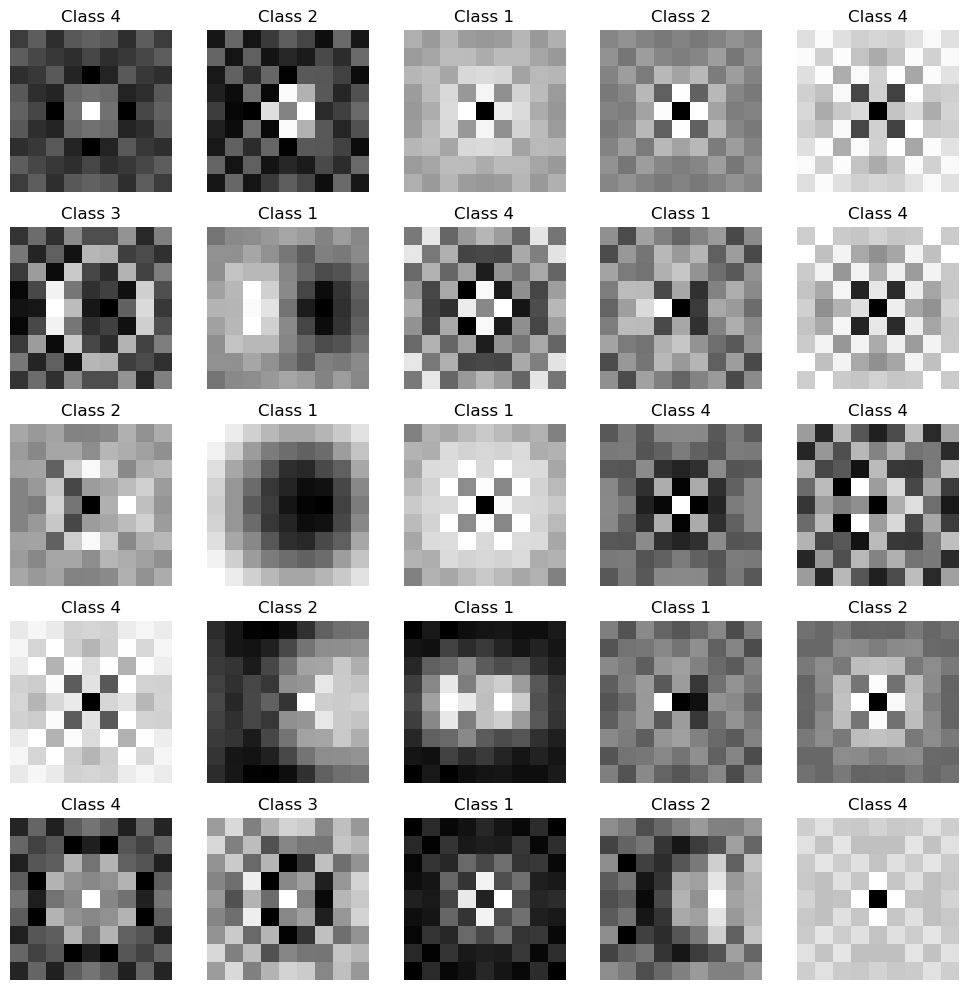

In [44]:
import numpy as np
import matplotlib.pyplot as plt

num_classes = 4

# create a figure with 5 rows and 5 columns to display 25 sample images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# randomly select 25 samples from the dataset
Random_samples = np.random.choice(X.shape[0], size=25, replace=False)

# iterate over the sample indices and plot each image with its corresponding label
for i, index in enumerate(Random_samples):
    # get the image and its label
    image = X_scaled[index]
    label = y[index]
    
    # compute the row and column indices for this image
    row = i // 5
    col = i % 5
    
    # plot the image in the appropriate subplot
    axes[row, col].imshow(image[..., 0], cmap='gray')
    axes[row, col].set_title(f'Class {label}')
    axes[row, col].axis('off')
    
# adjust the spacing between the subplots and display the figure
fig.tight_layout()
plt.show()

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define the model
model_3 = Sequential()
model_3.add(Conv2D(128, kernel_size=(1, 1), activation='sigmoid', input_shape=(9, 9, 301)))
model_3.add(MaxPooling2D(pool_size=(1, 1)))
model_3.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))
model_3.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))

model_3.add(MaxPooling2D(pool_size=(1, 1)))
model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(4, activation='softmax'))

# Compile the model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history_3 = model_3.fit(X_train_scaled, y_train_scaled_onehot, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
17/17 [==============================] - 3s 60ms/step - loss: 1.9483 - accuracy: 0.2830 - val_loss: 1.2863 - val_accuracy: 0.3433
Epoch 2/50
17/17 [==============================] - 1s 43ms/step - loss: 1.0975 - accuracy: 0.5057 - val_loss: 0.9454 - val_accuracy: 0.6418
Epoch 3/50
17/17 [==============================] - 1s 44ms/step - loss: 0.8497 - accuracy: 0.6491 - val_loss: 0.6884 - val_accuracy: 0.7463
Epoch 4/50
17/17 [==============================] - 1s 45ms/step - loss: 0.6709 - accuracy: 0.7358 - val_loss: 0.5763 - val_accuracy: 0.8358
Epoch 5/50
17/17 [==============================] - 1s 44ms/step - loss: 0.3794 - accuracy: 0.8868 - val_loss: 0.4126 - val_accuracy: 0.8358
Epoch 6/50
17/17 [==============================] - 1s 45ms/step - loss: 0.2268 - accuracy: 0.9283 - val_loss: 0.5204 - val_accuracy: 0.7910
Epoch 7/50
17/17 [==============================] - 1s 45ms/step - loss: 0.1396 - accuracy: 0.9623 - val_loss: 0.3490 - val_accuracy: 0.9104
Epoch 8/50
17

In [56]:
y_pred_model_3 = model_3.predict(X_test_scaled)

3/3 [==============================] - 0s 14ms/step


In [57]:
loss_model_3 , accuracy_model_3 = model_3.evaluate(X_test_scaled, y_test_scaled_onehot)

3/3 [==============================] - 0s 12ms/step - loss: 0.5544 - accuracy: 0.8690


In [59]:
cm_model_3 = confusion_matrix(y_test_scaled_onehot.argmax(axis=1), y_pred_model_3.argmax(axis=1))

accuracy = accuracy_score(y_test_scaled_onehot.argmax(axis=1), y_pred_model_3.argmax(axis=1))
accuracy

0.8690476190476191

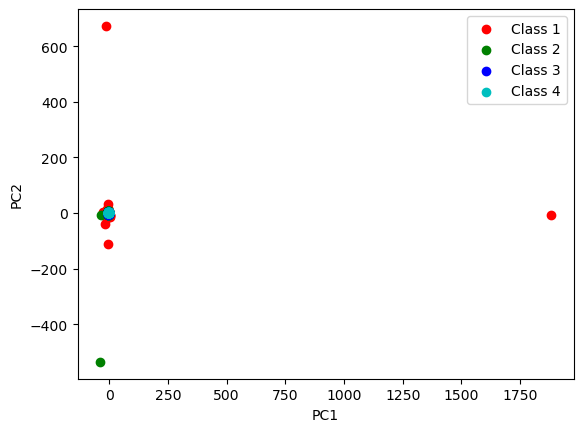

In [50]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Reshape the dataset
# X = X.reshape(416, -1)

# Normalize the data
normalizer = StandardScaler()
X_scaled_pca = normalizer.fit_transform(X_scaler)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_pca)

# Plot the data
colors = ['r', 'g', 'b', 'c'] # Colors for each class
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4'] # Class labels
for i in range(4):
    plt.scatter(X_pca[y == (i+1), 0], X_pca[y == (i+1), 1], c=colors[i], label=labels[i])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()